In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('./cat.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# Detect corners using Harris Corner Detection
dst = cv2.cornerHarris(img, blockSize=2, ksize=3, k=0.04)

In [39]:
dst_thresh = dst > 0.001 * dst.max()

In [40]:
np.invert(dst_thresh)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True]])

In [41]:
img_corners=img.copy()
img_corners[dst_thresh] = [255]
img_corners[np.invert(dst_thresh)] = [0]

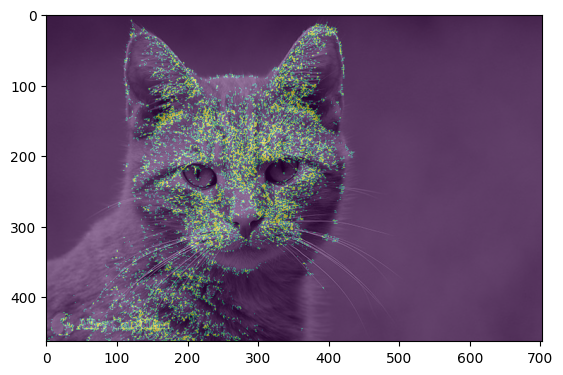

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img_corners, alpha=0.5)

In [22]:
img2 = cv2.imread('./cat2.jpg')

In [25]:
orb = cv2.ORB_create()

In [27]:
kp1, des1 = orb.detectAndCompute(img, None)

In [39]:
kp2, des2 = orb.detectAndCompute(img2, None)

In [40]:
# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [41]:
matches = bf.match(des1, des2)

In [42]:
# Sort matches based on distance
matches = sorted(matches, key=lambda x:x.distance)

In [43]:
# Draw top matches
img_matches = cv2.drawMatches(img, kp1, img2, kp2, matches[:10], None, flags=2)

In [ ]:
cv2.imshow('image', img_matches)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0)
  
# closing all open windows

cv2.destroyAllWindows()

cv2.waitKey(1)